<a href="https://colab.research.google.com/github/ImanFakury/imanRepository/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Full Name : Iman Alizadeh Fakouri
### Student Number : 401102134


# Support Vector Machines (SVM)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [ ]:
df = pd.read_csv("Liver_Disease.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################


###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################


In [ ]:
###############################################################################
## TODO: Find the shape of the dataset.         ##
###############################################################################
print('Shape of DataFrame')
df.shape

Shape of DataFrame


(583, 11)

In [ ]:
###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64

In [ ]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].dropna()

In [ ]:
###############################################################################
## TODO: Check whether the dataset is balanced or not.     ##
###############################################################################
df['label'].value_counts()

label
1    416
2    167
Name: count, dtype: int64

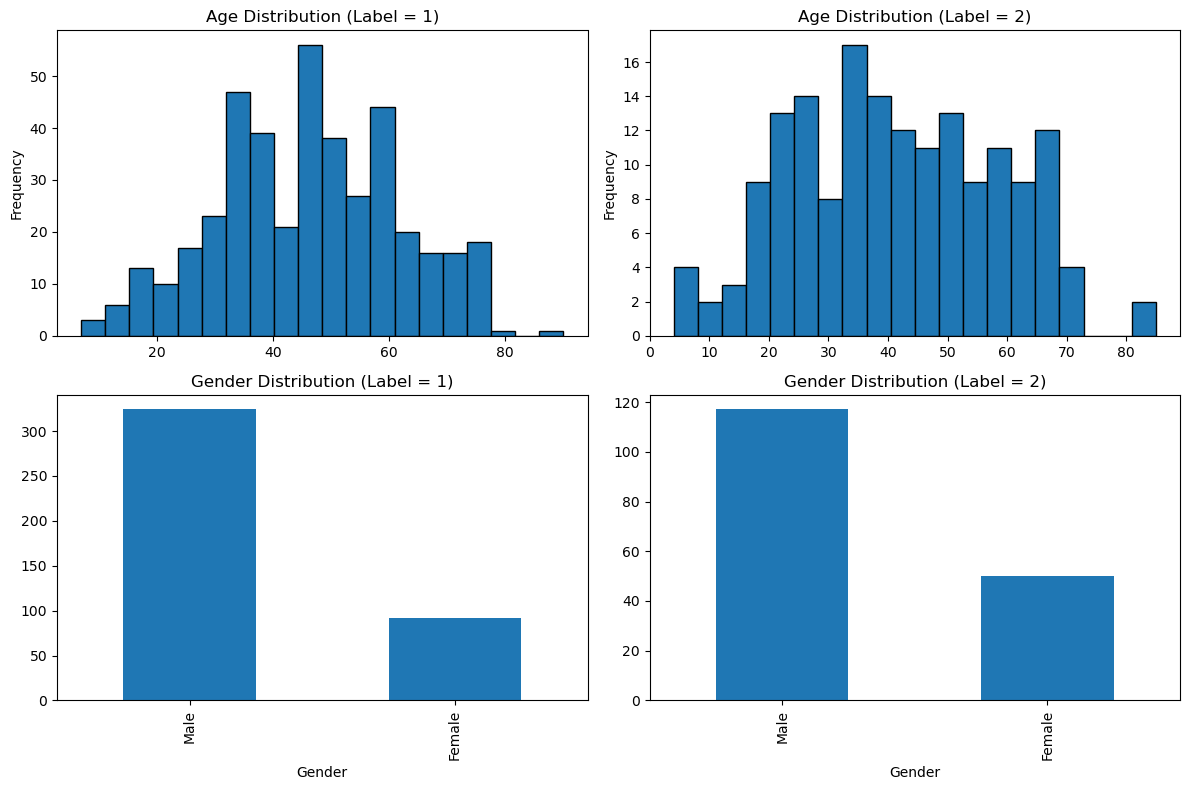

In [ ]:
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
df[df['label'] == 1]['Age'].plot(ax=ax[0, 0], kind='hist',bins=20, edgecolor='black')
ax[0, 0].set_title('Age Distribution (Label = 1)')


df[df['label'] == 2]['Age'].plot(ax=ax[0, 1], kind='hist', bins=20, edgecolor='black')
ax[0, 1].set_title('Age Distribution (Label = 2)')


df[df['label'] == 1]['Gender'].value_counts().plot(ax=ax[1, 0], kind='bar')
ax[1, 0].set_title('Gender Distribution (Label = 1)')


df[df['label'] == 2]['Gender'].value_counts().plot(ax=ax[1, 1], kind='bar')
ax[1, 1].set_title('Gender Distribution (Label = 2)')
plt.tight_layout()
plt.show()


##### Question: What do you conclude from the plots?
The age distribution of label 1 is mostly between 30 and 80, while the age distribution of label 2 is mostly between 20 and 70, indicating that label 2 has a younger age distribution compared to label 1. The gender distribution is the same for both labels.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
def remove_outliers(df, column):
    Q1, Q2, Q3 = df[column].quantile([0.25, 0.5, 0.75])
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

columns=['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
for column in columns:
    df = remove_outliers(df, column)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [ ]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])
################################################################################

In [ ]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.753086,1,0.08,0.000000,0.349296,0.086957,0.123077,0.547170,0.463415,0.389313,1
3,0.666667,0,0.20,0.230769,0.335211,0.057971,0.153846,0.547170,0.487805,0.465649,1
5,0.518519,0,0.52,0.461538,0.408451,0.130435,0.061538,0.698113,0.731707,0.694656,1
6,0.271605,1,0.16,0.076923,0.256338,0.086957,0.030769,0.584906,0.512195,0.465649,1
7,0.308642,1,0.16,0.153846,0.391549,0.057971,0.015385,0.528302,0.536585,0.541985,1
...,...,...,...,...,...,...,...,...,...,...,...
567,0.592593,0,0.88,1.000000,0.529577,0.144928,0.461538,0.396226,0.073171,0.000000,1
579,0.444444,0,0.04,0.000000,0.098592,0.362319,0.323077,0.396226,0.439024,0.541985,1
580,0.592593,0,0.12,0.076923,0.512676,0.550725,0.600000,0.471698,0.439024,0.465649,1
581,0.333333,0,0.32,0.307692,0.340845,0.275362,0.338462,0.547170,0.487805,0.465649,1


### SVM

#### spliting data

In [ ]:
## TODO Split the data into test and training sets.
from sklearn.model_selection import train_test_split
X=df.drop(columns=['label'])
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [ ]:
#########################################################################################
from sklearn.metrics import  accuracy_score
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy
#########################################################################################


0.62

#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [ ]:
from sklearn.model_selection import GridSearchCV
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
myX, X_val, myY, y_val = train_test_split(X_train, y_train, test_size=0.2)

param_grid = {
    'C': [ 0.1,1,10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale','auto']
}

model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_val, y_val)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_params

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Train an svm model on the entire training data using the parameters you found in the previous step.

In [ ]:
#########################################################################################
model = SVC(C=10,kernel='rbf',gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy
#########################################################################################


0.74

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

              precision    recall  f1-score   support

           1       0.71      0.93      0.81        29
           2       0.83      0.48      0.61        21

    accuracy                           0.74        50
   macro avg       0.77      0.70      0.71        50
weighted avg       0.76      0.74      0.72        50



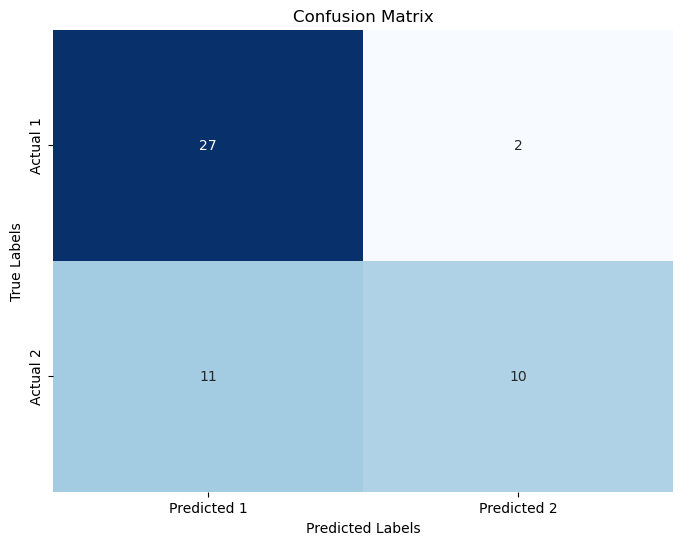

In [ ]:
#########################################################################################
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 1', 'Actual 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
#########################################################################################


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [ ]:
#########################################################################################
df = pd.read_csv("Liver_Disease.csv")
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].dropna()
def add_outliers(data, num_outliers):
    np.random.seed(42)
    outlier_records = []

    # Generate outliers
    for _ in range(num_outliers):
        outlier = {
            'Age': np.random.randint(100, 150),
            'Gender': np.random.choice(['Male', 'Female']),
            'Total_Bilirubin': np.random.uniform(10, 20),
            'Direct_Bilirubin': np.random.uniform(5, 10),
            'Alkaline_Phosphotase': np.random.randint(300, 600),
            'Alamine_Aminotransferase': np.random.randint(100, 300),
            'Aspartate_Aminotransferase': np.random.randint(100, 300),
            'Total_Protiens': np.random.uniform(10, 20),
            'Albumin': np.random.uniform(5, 10),
            'Albumin_and_Globulin_Ratio': np.random.uniform(1, 3),
            'label': np.random.choice([0, 1])
        }
        outlier_records.append(outlier)
    outliers = pd.DataFrame(outlier_records)
    data = pd.concat([data, outliers], ignore_index=True)
    return data.fillna(data.median(numeric_only=True))

# Example usage
df_with_outliers = add_outliers(df.copy(), num_outliers=10)


scaler = MinMaxScaler()
df_with_outliers[columns] = scaler.fit_transform(df_with_outliers[columns])
df_with_outliers['Gender']=df_with_outliers['Gender'].map({'Male':0,'Female':1})

X=df_with_outliers.drop(columns=['label'])
y=df_with_outliers['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)
#########################################################################################


In [ ]:
from sklearn.linear_model import LogisticRegression

model = SVC(C=10, kernel='rbf', gamma='scale')
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print("SVM Model Accuracy:", svm_accuracy)


model = LogisticRegression(max_iter=1000,solver='liblinear',C=10)
model.fit(X_train, y_train)
y_pred_log_reg = model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Logistic Regression Model Accuracy:", log_reg_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

SVM Model Accuracy: 0.7078651685393258
Logistic Regression Model Accuracy: 0.7303370786516854
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.72      0.97      0.82        63
           2       1.00      0.04      0.08        25

    accuracy                           0.71        89
   macro avg       0.68      0.67      0.47        89
weighted avg       0.79      0.71      0.61        89

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.98      0.84        63
           2       0.75      0.12      0.21        25

    accuracy                           0.73        89
   macro avg       0.49      0.37      0.35        89
weighted avg       0.73      0.73      0.65        89



C:\Users\imanf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imanf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imanf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
